<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_Bai7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Đức Trung - 6351071072

   BƯỚC 1: QUÁ TRÌNH HUẤN LUYỆN & ĐÁNH GIÁ
>>> Đang huấn luyện mô hình cây quyết định ID3...

>>> Độ chính xác trên tập kiểm thử: 78.06%

>>> Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.69      0.61      0.65        36
           2       0.72      0.66      0.69        35
           3       0.65      0.59      0.62        37
           4       0.81      0.78      0.79        37
           5       0.81      0.92      0.86        37
           6       0.97      0.92      0.94        37
           7       0.75      0.92      0.82        36
           8       0.76      0.79      0.78        33
           9       0.71      0.68      0.69        37

    accuracy                           0.78       360
   macro avg       0.78      0.78      0.78       360
weighted avg       0.78      0.78      0.78       360


>>> Đang hiển thị Ma trận

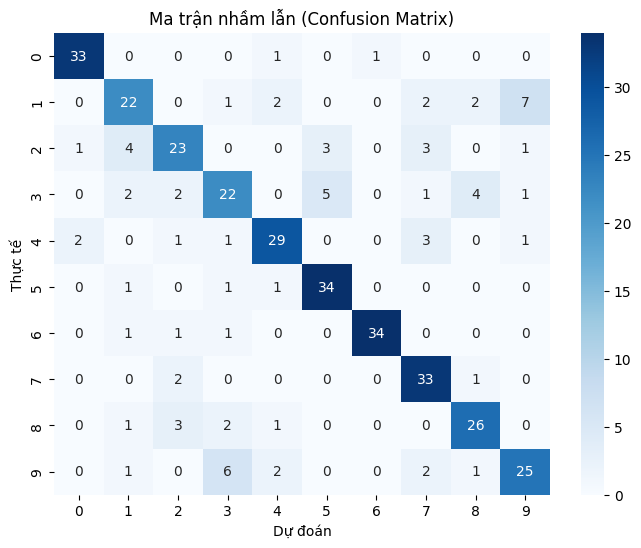


   BƯỚC 2: DỰ ĐOÁN ẢNH CHỤP THỰC TẾ

📸 Đang xử lý file: test_image_Bai7.jpg


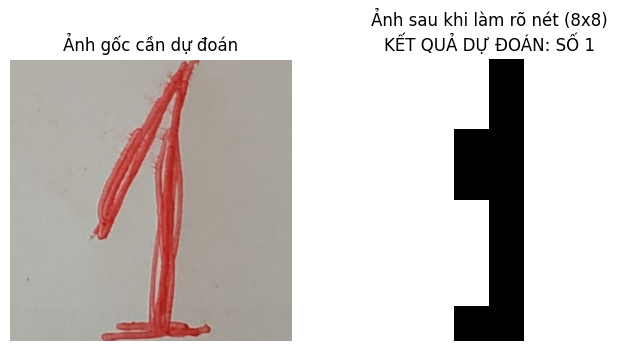


📸 Đang xử lý file: test_image_Bai7 (1).jpg


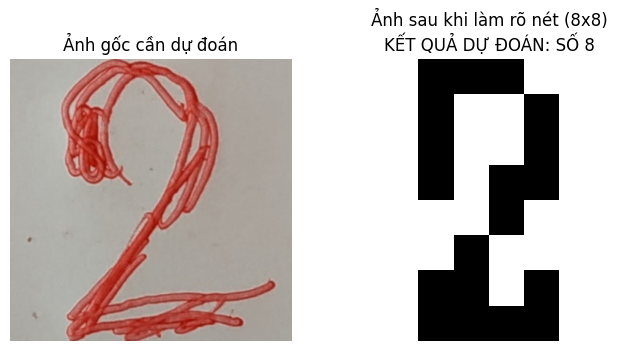

In [7]:
# bài 7 trang 27
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image, ImageOps
print("Nguyễn Đức Trung - 6351071072")
print("\n" + "="*50)
print("   BƯỚC 1: QUÁ TRÌNH HUẤN LUYỆN & ĐÁNH GIÁ")
print("="*50)
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)
print(">>> Đang huấn luyện mô hình cây quyết định ID3...")
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
y_pred_test = id3_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"\n>>> Độ chính xác trên tập kiểm thử: {acc * 100:.2f}%")
print("\n>>> Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_test))
print("\n>>> Đang hiển thị Ma trận nhầm lẫn...")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()
print("\n" + "="*50)
print("   BƯỚC 2: DỰ ĐOÁN ẢNH CHỤP THỰC TẾ")
print("="*50)
def predict_and_visualize(image_path, model):
    if not os.path.exists(image_path):
        print(f"❌ LỖI: Không tìm thấy file '{image_path}'")
        return

    try:
        img_original = Image.open(image_path)
        img = img_original.convert('L')
        img = ImageOps.invert(img)
        bbox = img.getbbox()
        if bbox: img = img.crop(bbox)
        old_size = img.size
        new_size = max(old_size)
        new_img = Image.new("L", (new_size, new_size), 0)
        new_img.paste(img, ((new_size - old_size[0])//2, (new_size - old_size[1])//2))
        img_8x8 = new_img.resize((8, 8), Image.Resampling.LANCZOS)
        img_array = np.array(img_8x8)
        img_processed = np.where(img_array > 110, 16, 0)
        img_input = img_processed.reshape(1, -1)
        prediction = model.predict(img_input)[0]
        print(f"\n📸 Đang xử lý file: {image_path}")
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img_original)
        axes[0].set_title("Ảnh gốc cần dự đoán")
        axes[0].axis('off')
        axes[1].imshow(img_processed, cmap=plt.cm.gray_r, vmin=0, vmax=16)
        axes[1].set_title(f"Ảnh sau khi làm rõ nét (8x8)\nKẾT QUẢ DỰ ĐOÁN: SỐ {prediction}")
        axes[1].axis('off')
        plt.show()
    except Exception as e:
        print(f"Lỗi khi xử lý: {e}")
file_list = ['test_image_Bai7.jpg', 'test_image_Bai7 (1).jpg']

for f in file_list:
    predict_and_visualize(f, id3_model)